<a href="https://colab.research.google.com/github/kirajcg/pyscbwrapper/blob/master/pyscbwrapper_en.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

We want to construct a graph over the population density in each county ('län') in Sweden over time. To help with this we have Statistics Sweden's data and Python, and our goal is to not have to leave the Python environment to not even fetch the data. Luckily there is a custom made package for this purpose, called pyscbwrapper

# Installation

pyscbwrapper is a kind of interface to the statistics database, written in Python 3. To run this interface we first need to install and import it. 

In [0]:
!pip install -q pyscbwrapper
from pyscbwrapper import SCB

# Initialisation

SCB is now a class we have imported, containing functions for navigating in the statstics database and fetch metadata as well as data from it. To use the SCB class we first need to initialise an object from it. Then we need one mandatory argument: language for the data and metadata. English and Swedish are supported. We choose English: 

In [0]:
scb = SCB('en')

# Navigation and metadata

Now we can look at the top node in the tree that is the statistics database's metadata: 

In [9]:
scb.info()

[{'id': 'AM', 'text': 'Labour market', 'type': 'l'},
 {'id': 'BE', 'text': 'Population', 'type': 'l'},
 {'id': 'BO', 'text': 'Housing, construction and building', 'type': 'l'},
 {'id': 'EN', 'text': 'Energy', 'type': 'l'},
 {'id': 'FM', 'text': 'Financial markets', 'type': 'l'},
 {'id': 'HA', 'text': 'Trade in goods and services', 'type': 'l'},
 {'id': 'HE', 'text': 'Household finances', 'type': 'l'},
 {'id': 'JO', 'text': 'Agriculture, forestry and fishery', 'type': 'l'},
 {'id': 'LE', 'text': 'Living conditions', 'type': 'l'},
 {'id': 'ME', 'text': 'Democracy', 'type': 'l'},
 {'id': 'MI', 'text': 'Environment', 'type': 'l'},
 {'id': 'NR', 'text': 'National accounts', 'type': 'l'},
 {'id': 'NV', 'text': 'Business activities', 'type': 'l'},
 {'id': 'OE', 'text': 'Public finances', 'type': 'l'},
 {'id': 'PR', 'text': 'Prices and Consumption', 'type': 'l'},
 {'id': 'TK', 'text': 'Transport and communications', 'type': 'l'},
 {'id': 'UF', 'text': 'Education and research', 'type': 'l'}]

We can now go down in the tree by using the id tag in the metadata we fetched. Let's say we are interested in the population statistics. 

In [0]:
scb.go_down('BE')

To fetch the metadata about the population statistics, we once again run the function info():

In [11]:
scb.info()

[{'id': 'BE0001', 'text': 'Name statistics', 'type': 'l'},
 {'id': 'BE0401', 'text': 'Population projections', 'type': 'l'},
 {'id': 'BE0101', 'text': 'Population statistics', 'type': 'l'}]

We can keep going down in the tree: 

In [12]:
scb.go_down('BE0001')
scb.info()

[{'id': 'BE0001D', 'text': 'Newborn', 'type': 'l'},
 {'id': 'BE0001G', 'text': 'All registered persons in Sweden', 'type': 'l'}]

Oops! Vi ville inte titta på namnstatistiken utan befolkningsstatistiken. Vi går upp ett steg igen och vidare ned till rätt nod: 
Whoops! We did not want the name statistics, but the population statistics. We go up one step and back down to the correct node: 

In [13]:
scb.go_up()
scb.go_down('BE0101')
scb.info()

[{'id': 'BE0101A', 'text': 'Number of inhabitants', 'type': 'l'},
 {'id': 'BE0101B', 'text': 'Average age', 'type': 'l'},
 {'id': 'BE0101C', 'text': 'Population density', 'type': 'l'},
 {'id': 'BE0101D', 'text': 'Mean population', 'type': 'l'},
 {'id': 'BE0101E', 'text': 'Foreign-born persons', 'type': 'l'},
 {'id': 'BE0101F', 'text': 'Foreign citizens', 'type': 'l'},
 {'id': 'BE0101G', 'text': 'Summary of vital events', 'type': 'l'},
 {'id': 'BE0101H', 'text': 'Live births', 'type': 'l'},
 {'id': 'BE0101I', 'text': 'Deaths', 'type': 'l'},
 {'id': 'BE0101J', 'text': 'Migration - internal and external', 'type': 'l'},
 {'id': 'BE0101S', 'text': 'Household', 'type': 'l'},
 {'id': 'BE0101L', 'text': 'Married, divorced and widowed', 'type': 'l'},
 {'id': 'BE0101N', 'text': 'Changes of citizenship', 'type': 'l'},
 {'id': 'BE0101O', 'text': 'Registered partnership', 'type': 'l'},
 {'id': 'BE0101P', 'text': 'Asylum-seekers', 'type': 'l'},
 {'id': 'BE0101Q', 'text': 'Foreign/Swedish background'

# Direct route to specific nodes

 If we know where in the tree we want to go, we can initialise an object using the id tags as extra variables:

In [15]:
scb = SCB('en', 'BE', 'BE0101')
scb.info()

[{'id': 'BE0101A', 'text': 'Number of inhabitants', 'type': 'l'},
 {'id': 'BE0101B', 'text': 'Average age', 'type': 'l'},
 {'id': 'BE0101C', 'text': 'Population density', 'type': 'l'},
 {'id': 'BE0101D', 'text': 'Mean population', 'type': 'l'},
 {'id': 'BE0101E', 'text': 'Foreign-born persons', 'type': 'l'},
 {'id': 'BE0101F', 'text': 'Foreign citizens', 'type': 'l'},
 {'id': 'BE0101G', 'text': 'Summary of vital events', 'type': 'l'},
 {'id': 'BE0101H', 'text': 'Live births', 'type': 'l'},
 {'id': 'BE0101I', 'text': 'Deaths', 'type': 'l'},
 {'id': 'BE0101J', 'text': 'Migration - internal and external', 'type': 'l'},
 {'id': 'BE0101S', 'text': 'Household', 'type': 'l'},
 {'id': 'BE0101L', 'text': 'Married, divorced and widowed', 'type': 'l'},
 {'id': 'BE0101N', 'text': 'Changes of citizenship', 'type': 'l'},
 {'id': 'BE0101O', 'text': 'Registered partnership', 'type': 'l'},
 {'id': 'BE0101P', 'text': 'Asylum-seekers', 'type': 'l'},
 {'id': 'BE0101Q', 'text': 'Foreign/Swedish background'

As you can see, we end up directly in the population statistics. 

---

The specific initialising of the object does not stop us from navigating in the tree: 

In [16]:
scb.go_up()
scb.info()

[{'id': 'BE0001', 'text': 'Name statistics', 'type': 'l'},
 {'id': 'BE0401', 'text': 'Population projections', 'type': 'l'},
 {'id': 'BE0101', 'text': 'Population statistics', 'type': 'l'}]

Anyway, we go directly back to population density: 

In [17]:
scb.go_down('BE0101', 'BE0101C')
scb.info()

[{'id': 'BefArealTathetKon',
  'text': 'Population density per sq. km, population and land area by region and sex. Year 1991 - 2018',
  'type': 't',
  'updated': '2019-03-07T09:30:00'}]

Now there is only one nod to go to, so we do that:

In [18]:
scb.go_down('BefArealTathetKon')
scb.info()

{'title': 'Population density per sq. km by region, sex, observations and year',
 'variables': [{'code': 'Region',
   'elimination': True,
   'text': 'region',
   'valueTexts': ['Sweden',
    'Stockholm county',
    'Upplands Väsby',
    'Vallentuna',
    'Österåker',
    'Värmdö',
    'Järfälla',
    'Ekerö',
    'Huddinge',
    'Botkyrka',
    'Salem',
    'Haninge',
    'Tyresö',
    'Upplands-Bro',
    'Nykvarn',
    'Täby',
    'Danderyd',
    'Sollentuna',
    'Stockholm',
    'Södertälje',
    'Nacka',
    'Sundbyberg',
    'Solna',
    'Lidingö',
    'Vaxholm',
    'Norrtälje',
    'Sigtuna',
    'Nynäshamn',
    'Uppsala county',
    'Håbo',
    'Älvkarleby',
    'Knivsta',
    'Heby',
    'Tierp',
    'Uppsala',
    'Enköping',
    'Östhammar',
    'Södermanland county',
    'Vingåker',
    'Gnesta',
    'Nyköping',
    'Oxelösund',
    'Flen',
    'Katrineholm',
    'Eskilstuna',
    'Strängnäs',
    'Trosa',
    'Östergötland county',
    'Ödeshög',
    'Ydre',
    'Kinda',

Note how the metadata differs from previous nodes: The keyword variables is there, which indicates that we are in a leaf node. From here we can therefore fetch the actual data. 

---

It is not necessary to call info() after each go_down() but it is a good idea to do anyway, if you are not very sure of what the database looks like.

# Fetch data

Now that we are in a leaf node we can look at which variables there are, and their respective ranges: 

In [19]:
scb.get_variables()

{'observations': ['Population density per sq. km',
  'Population',
  'Land area sq. km'],
 'region': ['Sweden',
  'Stockholm county',
  'Upplands Väsby',
  'Vallentuna',
  'Österåker',
  'Värmdö',
  'Järfälla',
  'Ekerö',
  'Huddinge',
  'Botkyrka',
  'Salem',
  'Haninge',
  'Tyresö',
  'Upplands-Bro',
  'Nykvarn',
  'Täby',
  'Danderyd',
  'Sollentuna',
  'Stockholm',
  'Södertälje',
  'Nacka',
  'Sundbyberg',
  'Solna',
  'Lidingö',
  'Vaxholm',
  'Norrtälje',
  'Sigtuna',
  'Nynäshamn',
  'Uppsala county',
  'Håbo',
  'Älvkarleby',
  'Knivsta',
  'Heby',
  'Tierp',
  'Uppsala',
  'Enköping',
  'Östhammar',
  'Södermanland county',
  'Vingåker',
  'Gnesta',
  'Nyköping',
  'Oxelösund',
  'Flen',
  'Katrineholm',
  'Eskilstuna',
  'Strängnäs',
  'Trosa',
  'Östergötland county',
  'Ödeshög',
  'Ydre',
  'Kinda',
  'Boxholm',
  'Åtvidaberg',
  'Finspång',
  'Valdemarsvik',
  'Linköping',
  'Norrköping',
  'Söderköping',
  'Motala',
  'Vadstena',
  'Mjölby',
  'Jönköping county',
  'Ane

Now that we have these, we can choose what we are interested in and create a json query. Let's say we are interested in the number of inhabitants per square kilometer in Örebro county the latest five years. 

In [0]:
scb.set_query(region=["Örebro county"], 
              observations=["Population density per sq. km"], 
              year=["2014", "2015", "2016", "2017", "2018"])

Now we can check how the query looks: 

In [22]:
scb.get_query()

{'query': [{'code': 'Region',
   'selection': {'filter': 'item', 'values': ['18']}},
  {'code': 'ContentsCode',
   'selection': {'filter': 'item', 'values': ['BE0101U1']}},
  {'code': 'Tid',
   'selection': {'filter': 'item',
    'values': ['2014', '2015', '2016', '2017', '2018']}}],
 'response': {'format': 'json'}}

The query is automatically formatted in the right way to fetch the data from the API. We fetch the data: 

In [23]:
scb.get_data()

{'columns': [{'code': 'Region', 'text': 'region', 'type': 'd'},
  {'code': 'Tid', 'text': 'year', 'type': 't'},
  {'code': 'BE0101U1', 'text': 'Population density per sq. km', 'type': 'c'}],
 'comments': [],
 'data': [{'key': ['18', '2014'], 'values': ['33.9']},
  {'key': ['18', '2015'], 'values': ['34.2']},
  {'key': ['18', '2016'], 'values': ['34.7']},
  {'key': ['18', '2017'], 'values': ['35.1']},
  {'key': ['18', '2018'], 'values': ['35.5']}]}

This is the same data that one can fetch from the statistics database on the website. Via a function in pyscbwrapper we can get the URL to the page with the data: 

In [25]:
scb.get_url()

'http://www.statistikdatabasen.scb.se/pxweb/en/ssd/START__BE__BE0101__BE0101C/BefArealTathetKon'

# More advanced calls

Now that we have seen what the data looks like we can fetch more of it to make interesting graphs. Since we already are on the correct place in the API structure we only have to construct a new query. Let's say we want data from every available year for each county. First we can pick out a list over all regions, filter out the counties through regular expressions, and after that use the list in the json query: 

In [0]:
import re

regions = scb.get_variables()['region']
r = re.compile(r'.* county')
county = list(filter(r.match, regioner))

scb.set_query(region=county,
              observations=["Population density per sq. km"])

In [35]:
scb.get_query()

{'query': [{'code': 'Region',
   'selection': {'filter': 'item',
    'values': ['01',
     '03',
     '04',
     '05',
     '06',
     '07',
     '08',
     '09',
     '10',
     '12',
     '13',
     '14',
     '17',
     '18',
     '19',
     '20',
     '21',
     '22',
     '23',
     '24',
     '25']}},
  {'code': 'ContentsCode',
   'selection': {'filter': 'item', 'values': ['BE0101U1']}}],
 'response': {'format': 'json'}}

This is the exact query we need. We fetch the data and place it in a variable so we can use it later: 

In [0]:
scb_data = scb.get_data()

As is good practice we look at the data before we do anything else: 

In [37]:
scb_data

{'columns': [{'code': 'Region', 'text': 'region', 'type': 'd'},
  {'code': 'Tid', 'text': 'year', 'type': 't'},
  {'code': 'BE0101U1', 'text': 'Population density per sq. km', 'type': 'c'}],
 'comments': [{'comment': 'Since 1 January 2007, Uppsala county has been expanded to include Heby municipality. Please note that the figures for the county are not comparable with earlier figures.\r\n',
   'value': '03',
   'variable': 'Region'},
  {'comment': 'Since 1 January 2007, Västmanland county no longer includes Heby municipality. Please note that the figures for the county are not comparable with earlier figures.\r\n',
   'value': '19',
   'variable': 'Region'}],
 'data': [{'key': ['01', '1991'], 'values': ['254.9']},
  {'key': ['01', '1992'], 'values': ['257.3']},
  {'key': ['01', '1993'], 'values': ['259.8']},
  {'key': ['01', '1994'], 'values': ['263.2']},
  {'key': ['01', '1995'], 'values': ['265.9']},
  {'key': ['01', '1996'], 'values': ['268.8']},
  {'key': ['01', '1997'], 'values': 

The actual data we look for is here: 

In [0]:
scb_fetch = scb_data['data']

Once again we check that we have gotten the correct data: 

In [39]:
scb_fetch

[{'key': ['01', '1991'], 'values': ['254.9']},
 {'key': ['01', '1992'], 'values': ['257.3']},
 {'key': ['01', '1993'], 'values': ['259.8']},
 {'key': ['01', '1994'], 'values': ['263.2']},
 {'key': ['01', '1995'], 'values': ['265.9']},
 {'key': ['01', '1996'], 'values': ['268.8']},
 {'key': ['01', '1997'], 'values': ['271.6']},
 {'key': ['01', '1998'], 'values': ['274.8']},
 {'key': ['01', '1999'], 'values': ['276.6']},
 {'key': ['01', '2000'], 'values': ['279.7']},
 {'key': ['01', '2001'], 'values': ['282.1']},
 {'key': ['01', '2002'], 'values': ['283.8']},
 {'key': ['01', '2003'], 'values': ['285.4']},
 {'key': ['01', '2004'], 'values': ['287.3']},
 {'key': ['01', '2005'], 'values': ['289.9']},
 {'key': ['01', '2006'], 'values': ['294.2']},
 {'key': ['01', '2007'], 'values': ['299.0']},
 {'key': ['01', '2008'], 'values': ['303.9']},
 {'key': ['01', '2009'], 'values': ['309.7']},
 {'key': ['01', '2010'], 'values': ['315.1']},
 {'key': ['01', '2011'], 'values': ['320.5']},
 {'key': ['01

Now we need to understand the structure of the data. We have gotten a list of dictionaries where the first variable 'key' contains the domain (in this case county and year), and the variable 'values' contains the value of the observation variable (in this case inhabitants per square kilometer). To change this into time series that can be used for visualisation we need a few syntactic tricks that are described below. 

# Data processing

What we look for is one time series per county. Therefore we need to restructure the data we have gotten before we can do anything. This is outside the functionality of pyscbwrapper, but we can easily solve it. A good structure would be a dictionary with county as key and another dictionary as value, where the inner dictionary has year as key and variable value as value. To achieve this we take the list of counties that we created earlier and connect it to the county codes, which we can take from their place in get_query(), in this case 0. By comparing these codes, which are now connected to the county names, to the codes in the data, we can connect the county names to the data. 

This way we create the structure we want, and we take the opportunity to cast the the values as numeric. 

In [0]:
codes = scb.get_query()['query'][0]['selection']['values']

countydic = {}
for i in range(len(codes)):
  countydic[codes[i]] = county[i]


countydata = {}

for code in countydic:
  countydata[countydic[code]] = {}
  for i in range(len(scb_fetch)):
    if scb_fetch[i]['key'][0] == code:
      countydata[countydic[code]][scb_fetch[i]['key'][1]] = \
      float(scb_fetch[i]['values'][0])


This got a bit hacky, so let's see if we got the structure we wanted: 

In [43]:
countydata

{'Blekinge county': {'1991': 51.4,
  '1992': 51.4,
  '1993': 51.6,
  '1994': 52.0,
  '1995': 51.9,
  '1996': 51.7,
  '1997': 51.6,
  '1998': 51.5,
  '1999': 51.1,
  '2000': 51.0,
  '2001': 50.9,
  '2002': 50.9,
  '2003': 50.9,
  '2004': 51.0,
  '2005': 51.1,
  '2006': 51.4,
  '2007': 51.5,
  '2008': 51.7,
  '2009': 51.8,
  '2010': 52.0,
  '2011': 52.2,
  '2012': 51.9,
  '2013': 52.1,
  '2014': 52.6,
  '2015': 53.3,
  '2016': 54.1,
  '2017': 54.4,
  '2018': 54.5},
 'Dalarna county': {'1991': 10.3,
  '1992': 10.3,
  '1993': 10.3,
  '1994': 10.3,
  '1995': 10.3,
  '1996': 10.2,
  '1997': 10.1,
  '1998': 10.0,
  '1999': 10.0,
  '2000': 9.9,
  '2001': 9.8,
  '2002': 9.8,
  '2003': 9.8,
  '2004': 9.8,
  '2005': 9.8,
  '2006': 9.8,
  '2007': 9.8,
  '2008': 9.8,
  '2009': 9.8,
  '2010': 9.8,
  '2011': 9.9,
  '2012': 9.8,
  '2013': 9.9,
  '2014': 10.0,
  '2015': 10.0,
  '2016': 10.2,
  '2017': 10.2,
  '2018': 10.2},
 'Gotland county': {'1991': 18.3,
  '1992': 18.3,
  '1993': 18.4,
  '1994': 18.

This looks about right. Now we can loop over the keys and plot the values using key on the x axis and value on the y axis. 

# Data visualisation

We need numpy, pandas, and matplotlib for this. We install and import. 

In [0]:
!pip install -q matplotlib
!pip install -q pandas
!pip install -q numpy

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

Now we can make a neat graph. 

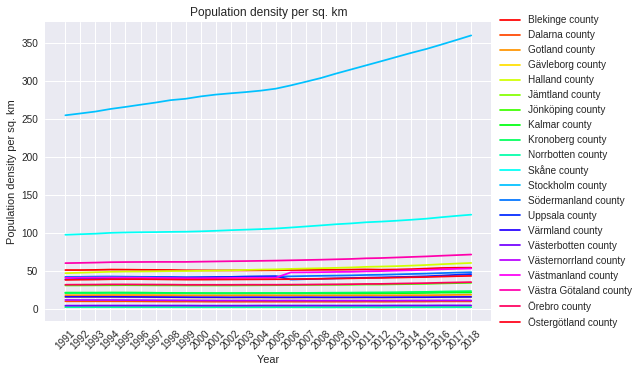

In [45]:
df = pd.DataFrame(countydata)
df = df.reset_index()
df = df.rename(columns={"index":"Year"})
ax = df.plot(x=df.index, xticks=np.arange(len(df.index)), colormap='hsv')
ax.set_xticklabels(df["Year"], rotation=45)
plt.title("Population density per sq. km")
plt.xlabel("Year")
plt.ylabel("Population density per sq. km")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

Now we have what we wanted, and we never left the Python environment!